<b><font size="6">Naive Bayes</font><a class="anchor"><a id='toc'></a></b><br>

In this notebook we are going to apply Naive Bayes in Python.

<img src="https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png" width="400px"/> <br><br>

On a very fundamental level Bayes' theorem, or Bayes rule, is a mathematical formula used to calculate the conditional probability of events in statistics and probability theory. Its mathematical proof is presented below:

We start with the definition of joint probability:

$$
P(A \cap B) = P(A \vert B) P(B)
$$

This can be rearranged to give the definition of conditional probability:

$$
P(A \vert B) = \frac{P(A \cap B)}{P(B)}
$$

Similarly, we can express $P(B \vert A)$ as:

$$
P(B \vert A) = \frac{P(A \cap B)}{P(A)}
$$

Taking the ratio of these two expressions gives us:

$$
\frac{P(A \vert B)}{P(B \vert A)}= \frac{P(B)}{P(A)}
$$

Rearranging this equation leads us to Bayes' theorem:

$$
P(A \vert B)= \frac{P(B \vert A) P(A)}{P(B)}
$$

Another way of looking at it uses slightly different terminology. We can think of Bayes’ theorem as a way to update knowledge when presented with new evidence or data:</b>
1. We hold a preconceived notion or belief as **prior**
2. We calculate the likelihood of the data conditioned on our **prior**
3. The prior uses the data to be updated into a **posterior**

In more formal terms, given hypothesis ***y*** and evidence **X**:

$$
P(y \vert X) = \frac{P(X \vert y) P(y)}{P(X)}
$$

* P( X | *y* ) - the **likelihood of the evidence if the hypothesis was correct**
* P(*y*) – the **prior**, what we believed before we saw the evidence
* P(X) - the **likelihood of that evidence under any circumstances**
* P( *y* | X ) - the **posterior** (i.e. the updated prior)

Bayesian classification uses Bayes' theorem to predict class membership probabilities (i.e. the probability that a given sample belongs to a specific class). 

To classify **y** given $X$, we would need to be able to compute different probabilities:
1. The prior $P(y)$,
2. The probability distribution of the data $P(X)$,
3. The likelihood of the data conditioned on the prior $P( X \vert y)$

<div class="alert alert-block alert-info">
    
# TOC<a class="anchor"><a id='toc'></a></b><br>
- [<font color='#E8800A'>Understanding Naive Bayes using Categorical Data</font>](#first-bullet)<br>
* [<font color='#E8800A'>Gaussian Naive Bayes</font>](#second-bullet) <br>
- [<font color='#E8800A'>Exercise</font>](#third-bullet)<br>
    
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# <font color='#E8800A'>Naive Bayes for Categorical Data</font><a class="anchor" id="second-bullet"></a> 
[Back to TOC](#toc)

<a class="anchor" id="company">

## Weather Data
</a>

I present you a small dataset with only categorical attributes about playing or not tennis and we will build a Naive Bayes classifier from scratch!

__`Step 1:`__ Import the Dataset

In [2]:
weather = pd.read_csv('weather.csv')

#windy is a boolean value, so we need to convert it to a string to use it for this exercise
weather['WINDY'] = weather['WINDY'].astype(str)

In [3]:
weather

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Overcast,Mild,Normal,False,Yes


Now, with regards to our dataset, we can apply Bayes’ theorem in following way:

$$P(Play|features)=\frac{P(feature|Play)*P(Play)}{P(features)}$$

Training the model, in Bayesian logic, means to calculate the probabilities on the right side of the equation. Making a prediction means to calculate the probability on the left side of the equation for each class and select the class with the highest probability.

Assume this instance: `today = (Outlook = Sunny, Temperature = Cool, Humidity = High, Windy = True)`<br>

To make a prediction, we need to calculate the probability of **Play** being **Yes** or **No** given the independent features. Variable **Play** has two possible outcomes: **Yes** and **No**.<br>

$$P(Yes|today)=\frac{P(today|Yes)*P(Yes)}{P(today)}$$

and

$$P(No|today)=\frac{P(today|No)*P(No)}{P(today)}$$

Computing these values in the real world is difficult:<br>
1. There most likely are dependencies between features
2. The relative importance of each feature is not obvious
3. We do not know, and cannot know, the *real* probability distribution of the data

How difficult you ask? Well, let's see the disentanglement of P(today|Play):

$P(Sunny, Cool, High, True|Yes) = w_1P(Sunny|Cool, High, True, Yes) * w_2P(Cool|Sunny, High, True, Yes) * w_3P(High|Sunny, Cool, True, Yes) * w_4P(True|Sunny, Cool, High, Yes)$

and

$P(Sunny, Cool, High, True|No) = w_1P(Sunny|Cool, High, True, No) * w_2P(Cool|Sunny, High, True, No) * w_3P(High|Sunny, Cool, True, No) * w_4P(True|Sunny, Cool, High,No)$

#### <font color='#E8800A'>Enter Naive Bayes</font>

Naive Bayes simplifies the Bayesian logic by making very stupid, but mathematically convenient, assumptions:
1. All features are independent
2. All features are equally important
3. The probability distribution of the data follows a distribution that we know how to model (e.g. a Gaussian distribution)

With these assumptions, we can simplify the above equations to:

$P(Sunny, Cool, High, True|Yes) = w_1P(Sunny|Yes) * w_2P(Cool|Yes) * w_3P(High|Yes) * w_4P(True|Yes)$

and

$P(Sunny, Cool, High, True|No) = w_1P(Sunny|No) * w_2P(Cool|No) * w_3P(High|No) * w_4P(True|No)$

where $w_1, w_2, w_3, w_4$ are constants that we can ignore when comparing the two equations.

In the following cells, we are going to create a Naive Bayes classifier from scratch and apply it to the weather dataset. For each possible outcome, we will need to compute the *prior* and the *likelihood* of each feature given the outcome variable.

Then, we will need to check what is the probability of the new instance to belong to each class and select the most likely class, thus making a **prediction**.

__`Step 2:`__ Let's start with y = Yes.

$P(Yes|today) = \frac{P(Sunny|Yes) * P(Cool|Yes) * P(High|Yes) * P(True|Yes) * P(Yes)}{P(today)}$

__`Step 2.1:`__ Calculate each part.

p1 = P(Outlook = Sunny|Yes)

In [8]:
#CODE HERE
p1 = len(weather[(weather.PLAY == 'Yes') & (weather.OUTLOOK == "Sunny")]) / len(weather[weather.PLAY == "Yes"])
p1

0.2222222222222222

p2 = P(Temperature = Cool|Yes)

In [9]:
#CODE HERE
p2 = len(weather[(weather.PLAY == 'Yes') & (weather.TEMPERATURE == "Cool")]) / len(weather[weather.PLAY == "Yes"])
p2

0.3333333333333333

p3 = P(Humidity = High|Yes)

In [10]:
#CODE HERE
p3 = len(weather[(weather.PLAY == 'Yes') & (weather.HUMIDITY == "High")]) / len(weather[weather.PLAY == "Yes"])
p3

0.3333333333333333

p4 = P(Wind = True|Yes)

In [12]:
#CODE HERE
p4 = len(weather[(weather.PLAY == 'Yes') & (weather.WINDY == "True")]) / len(weather[weather.PLAY == "Yes"])
p4

0.3333333333333333

p5 = P(Yes)

In [13]:
#CODE HERE
p5 = len(weather[weather.PLAY == 'Yes']) / len(weather)
p5

0.6428571428571429

p_yes_today = P(Yes|today)

In [14]:
#CODE HERE
p_yes_today = p1 * p2 * p3 * p4 * p5
p_yes_today

0.005291005291005291

In [ ]:
#CODE HERE

__`Step 3:`__ Now, we need to do the same for y = No.

$P(No|today) = \frac{P(Sunny|No) * P(Cool|No) * P(High|No) * P(True|No) * P(No)}{P(today)}$

__`Step 3.1:`__ Calculate each part in the same manner as before.

In [15]:
#CODE HERE
p1 = len(weather[(weather.PLAY == 'No') & (weather.OUTLOOK == "Sunny")]) / len(weather[weather.PLAY == "No"])
p1

0.6

In [16]:
#CODE HERE
p2 = len(weather[(weather.PLAY == 'No') & (weather.TEMPERATURE == "Cool")]) / len(weather[weather.PLAY == "No"])
p2

0.2

In [17]:
#CODE HERE
p3 = len(weather[(weather.PLAY == 'No') & (weather.HUMIDITY == "High")]) / len(weather[weather.PLAY == "No"])
p3

0.8

In [18]:
#CODE HERE
p4 = len(weather[(weather.PLAY == 'No') & (weather.WINDY == "True")]) / len(weather[weather.PLAY == "No"])
p4

0.6

In [19]:
#CODE HERE
p5 = len(weather[weather.PLAY == 'No']) / len(weather)
p5

0.35714285714285715

In [20]:
#CODE HERE
p_no_today = p1 * p2 * p3 * p4 * p5
p_no_today

0.02057142857142857

In [21]:
p_yes_today

0.005291005291005291

__`Step 4:`__ Normalize the results to obtain something similar to a probability (The sum of the probabilities for *Yes* and *No* should be 1).

In [22]:
#CODE HERE
P_yes_today = p_yes_today / (p_yes_today + p_no_today)

In [23]:
#CODE HERE
P_yes_today

0.20458265139116202

In [24]:
#CODE HERE
P_no_today = p_no_today / (p_yes_today + p_no_today)

In [27]:
P_no_today

0.795417348608838

__Result:__ The outcome of today is No!

## Now we can use the sklearn Naive Bayes for categorical features to confirm our result

__`Step 1:`__ Import CategoricalNB from sklearn.naive_bayes

In [28]:
# The model depends on the distribution, in this case we're using categorical distribution.
# But in the next example "Tugas" we'll use Gaussian (Normal) distribution
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

__`Step 2:`__ Assign to the object `data` the dataset excepting the dependent variable

In [29]:
data = weather.drop(['PLAY'], axis=1)

__`Step 3:`__ Assign to the object `target`the dependent variable 

In [34]:
target = pd.DataFrame(weather['PLAY'], columns = ['PLAY'])

__`Step 4:`__ Encode the dataset to apply the model

__`Step 4.1:`__ Import the OrdinalEncoder

In [31]:
# Ordinal Encoder encode categorical variable as integers
from sklearn.preprocessing import OrdinalEncoder

__`Step 4.2:`__ Create two instances of the encoder

In [35]:
enc1 = OrdinalEncoder() #encoder for features
enc2 = OrdinalEncoder() #encoder for labels/targets

__`Step 4.3:`__ Fit the encoder to the data and the target

In [36]:
enc1.fit(data)

OrdinalEncoder()

In [37]:
data = pd.DataFrame(enc1.transform(data), columns = data.columns)

In [38]:
data

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY
0,2.0,1.0,0.0,0.0
1,2.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,0.0
4,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,1.0
6,0.0,0.0,1.0,1.0
7,2.0,2.0,0.0,0.0
8,2.0,0.0,1.0,0.0
9,0.0,2.0,1.0,0.0


In [39]:
target = enc2.fit_transform(target)

In [40]:
target

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]])

__`Step 5:`__ Split the dataset into X_train, X_val, y_train and y_val, defining `test_size` as 0.25 , `random_state` equal to 5 and `stratify` by the target.

In [41]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.25, random_state=5, stratify=target)

__`Step 6:`__ Using CategoricalNB, create a Naive Bayes classifier instance called modelNB2.

In [42]:
modelCNB = CategoricalNB()

### Methods in CategoricalNB

__`Step 7:`__ Use the `.fit()`method of model to fit the model to the array of points `X_train` and `y_train`,i.e., associate the argument keyword `X` to `X_train` and `y` to `y_train`.

In [43]:
#CODE HERE
modelCNB.fit(X_train, y_train)

CategoricalNB()

In [44]:
y_train.shape

(10, 1)

__`Step 8:`__ Use the `.predict()` method to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [45]:
labels_train = modelCNB.predict(X_train)
labels_val = modelCNB.predict(X_val)

array([0., 1., 0., 1.])

__`Step 9:`__ Use the `.predict_proba()` method to obtain the probability estimates for the `X_val`

In [46]:
modelCNB.predict_proba(X_val)

array([[0.61049285, 0.38950715],
       [0.31982232, 0.68017768],
       [0.61049285, 0.38950715],
       [0.46545455, 0.53454545]])

__`Step 10:`__ Use the `.score()` method of modelNB to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`

In [50]:
modelCNB.score(X_train, y_train)

0.9

__`Step 11:`__ Use the `.score()` method of modelNB to obtain the mean accuracy of the given test data `X_val` and the true labels for X, `y_val`

In [52]:
modelCNB.score(X_val, y_val)

0.75

__`Step 12:`__ Make prediction for today!

In [53]:
today = (['Sunny', 'Cool', 'High', 'True'])

In [54]:
today

['Sunny', 'Cool', 'High', 'True']

__`Step 13:`__ Transform the data with the encoder

In [55]:
today = enc1.transform([today])

In [56]:
today

array([[2., 0., 0., 1.]])

__`Step 13.1:`__ Make the prediction for the encoded datapoint

In [57]:
result = modelCNB.predict(today)

In [58]:
result

array([0.])

__`Step 13.2:`__ Reverse the encoding to understand the result

In [61]:
enc2.inverse_transform([result])

array([['No']], dtype=object)

<a class="anchor" id="company">

## Tugas Dataset
</a>

Tugas is a online Portuguese retailer offering an assortment of goods within 5 major categories: 

1. Clothes
2. Housekeeping
3. Kitchen
4. Small appliances
5. Toys

Tugas started a loyalty program 2 years ago. Among other objectives, the program’s aim is to gather Customer information to better drive the marketing efforts.

Below is the description of the data. Note that `Education`and `Marital_Status`are categorical variables that have been transformed into dummys.<br>

<img src="image\variables.png" style="height:450px">
<hr>

### 1. Import the data

__`Step 1:`__ Import Tugas Dataset (don't forget to import pandas to read the excel file).

In [62]:
df_tugas = pd.read_excel('tugas_dataset.xlsx')

### 2. Explore the data

__`Step 2:`__ It is time to explore and understand the data we have.

__`Step 2.1:`__ Check the first five rows of the dataset `tugas_dataset` using the method `.head()`.

In [63]:
df_tugas

,Custid,Year_Birth,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Dependents,Income,Rcn,...,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Education_Basic,Education_Graduation,Education_Master,Education_PhD,DepVar
0,1003,1991,1,0,1,0,0,1,29761.20,69,...,1,24,59,41,3,0,1,0,0,0
1,1004,1956,1,0,1,0,0,1,98249.55,10,...,6,5,35,65,5,0,0,1,0,0
2,1006,1983,0,0,0,1,0,1,23505.30,65,...,2,1,67,33,4,0,0,0,1,0
3,1007,1970,0,0,0,0,0,1,72959.25,73,...,1,8,46,54,4,0,1,0,0,0
4,1009,1941,0,0,1,0,0,0,114973.95,75,...,9,9,17,83,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10989,1996,0,0,0,0,0,1,29551.20,41,...,22,2,59,41,3,1,0,0,0,0
2496,10991,1940,0,0,1,0,0,0,132566.70,36,...,9,8,22,78,6,0,1,0,0,0
2497,10993,1955,0,0,0,1,0,0,91768.95,1,...,8,1,47,53,4,0,1,0,0,0
2498,10994,1961,0,0,1,0,0,1,99085.35,1,...,3,4,55,45,5,1,0,0,0,0


__`Step 2.2:`__ Using the method `.info()`, check the data types of the variables of `tugas_dataset` and if there are any missing values.

In [64]:
df_tugas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Custid                   2500 non-null   int64  
 1   Year_Birth               2500 non-null   int64  
 2   Gender_M                 2500 non-null   int64  
 3   Marital_Status_Divorced  2500 non-null   int64  
 4   Marital_Status_Married   2500 non-null   int64  
 5   Marital_Status_Together  2500 non-null   int64  
 6   Marital_Status_Widow     2500 non-null   int64  
 7   Dependents               2500 non-null   int64  
 8   Income                   2431 non-null   float64
 9   Rcn                      2500 non-null   int64  
 10  Frq                      2500 non-null   int64  
 11  Mnt                      2500 non-null   float64
 12  Clothes                  2500 non-null   int64  
 13  Kitchen                  2500 non-null   int64  
 14  SmallAppliances         

__`Step 2.3:`__ Get the main descriptive statistics for all the variables in `tugas_dataset` using the method `.describe()`.

In [65]:
df_tugas.describe().T

,count,mean,std,min,25%,50%,75%,max
Custid,2500.0,6029.178400,2911.943629,1003.00,3466.500,6028.50,8599.250,10997.00
Year_Birth,2500.0,1966.737200,17.046019,1937.00,1952.000,1966.00,1981.000,1997.00
Gender_M,2500.0,0.234000,0.423457,0.00,0.000,0.00,0.000,1.00
Marital_Status_Divorced,2500.0,0.092400,0.289648,0.00,0.000,0.00,0.000,1.00
Marital_Status_Married,2500.0,0.380800,0.485681,0.00,0.000,0.00,1.000,1.00
Marital_Status_Together,2500.0,0.242400,0.428621,0.00,0.000,0.00,0.000,1.00
Marital_Status_Widow,2500.0,0.046000,0.209527,0.00,0.000,0.00,0.000,1.00
Dependents,2500.0,0.701200,0.457824,0.00,0.000,1.00,1.000,1.00
Income,2431.0,74062.838873,28807.225833,10500.00,51013.725,74525.85,97300.875,144204.90
Rcn,2500.0,62.938400,69.643494,0.00,27.000,53.00,78.000,549.00


### 3. Prepare the data

__`Step 3:`__ After the exploration and understanding of data, we need to fix possible problems on data like missing values or outliers and we can create new variables in order to get variables with higher predictive power.

#### 3.1. Incoherences

__`Step 3.1:`__ After exploring the dataset, in this step check for any kind of mismatches, inconsistencies, __incoherence__ and redundancies.

In [66]:
df_tugas['Recomendation'].unique()

array([3, 5, 4, 1, 2, 6])

In the description of the dataset, it is written that the variable _Recomendation_ only assumes values from 1-5.

In [67]:
df_tugas.loc[(df_tugas['Mnt'] > 0) & (df_tugas['Frq'] == 0)]

,Custid,Year_Birth,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Dependents,Income,Rcn,...,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Education_Basic,Education_Graduation,Education_Master,Education_PhD,DepVar


Checking if there are any clients that have spent money, but do not have any purchase registered.

#### 3.2. Outliers

__`Step 3.2:`__ The __outliers__ can be a result of a mistake during data collection or it can be just an indication of variance in your data. Check if there are any since these can negatively influence the model.

In [68]:
hk_mean = df_tugas['HouseKeeping'].mean()
hk_std = df_tugas['HouseKeeping'].std()

df_tugas.loc[df_tugas['HouseKeeping'] > hk_mean + 5 * hk_std]

,Custid,Year_Birth,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Dependents,Income,Rcn,...,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Education_Basic,Education_Graduation,Education_Master,Education_PhD,DepVar
514,3028,1992,0,0,0,0,0,1,23139.90,23,...,54,0,56,44,5,0,1,0,0,0
724,3932,1996,0,0,0,0,0,1,27989.85,94,...,50,1,45,55,4,1,0,0,0,0
804,4254,1995,0,0,0,0,0,1,22707.30,8,...,48,2,55,45,3,1,0,0,0,0
1029,5148,1957,0,0,0,1,0,1,97655.25,55,...,46,3,42,58,4,1,0,0,0,0
1544,7258,1995,1,0,0,0,0,1,26341.35,22,...,49,3,73,27,4,1,0,0,0,0


#### 3.3. Null values

__`Step 3.3:`__ Handling __missing data__ is important as many machine learning algorithms do not support data with missing values.

In [69]:
df_tugas['Income'] = df_tugas['Income'].fillna(df_tugas['Income'].median())

In [70]:
df_tugas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Custid                   2500 non-null   int64  
 1   Year_Birth               2500 non-null   int64  
 2   Gender_M                 2500 non-null   int64  
 3   Marital_Status_Divorced  2500 non-null   int64  
 4   Marital_Status_Married   2500 non-null   int64  
 5   Marital_Status_Together  2500 non-null   int64  
 6   Marital_Status_Widow     2500 non-null   int64  
 7   Dependents               2500 non-null   int64  
 8   Income                   2500 non-null   float64
 9   Rcn                      2500 non-null   int64  
 10  Frq                      2500 non-null   int64  
 11  Mnt                      2500 non-null   float64
 12  Clothes                  2500 non-null   int64  
 13  Kitchen                  2500 non-null   int64  
 14  SmallAppliances         

### 4. Modelling

__`Step 4:`__ It is time to create a model. At this step, we are going to implement the Naive Bayes algorithm.

# <font color='#E8800A'>Gaussian Naive Bayes</font> <a class="anchor" id="first-bullet"></a>
  [Back to TOC](#toc)

First we start with a dataset called tugas, which has continuous and categorical attributes and a binary target variable. 
Because we have mostly continuous attributes we will be using Gaussian Naive Bayes, so the likelihood of the features is assumed to be Gaussian:

$$
\begin{equation*}
P(x_{i}\mid y) = \frac{1}{\sqrt{2\pi \sigma_y^{2}}} \exp \left(-\frac{(x_{i} -\mu_{y})^2}{2\sigma_y^{2}} \right)
\end{equation*}
$$

__`Step 4.1:`__ Import GaussianNB from sklearn.naive_bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

__`Step 4.2:`__ Assign to the object `data` the values from tugas excepting the dependent variable

In [72]:
data = df_tugas.drop(['DepVar', 'Custid'], axis=1)

__`Step 4.3:`__ Assign to the object `target`the dependent variable from tugas

In [73]:
target = df_tugas['DepVar']

__`Step 4.4:`__ Split the dataset tugas into X_train, X_val, y_train and y_val, defining `test_size` as 0.25 , `random_state`equal to 5 and `stratify` by the target.

In [74]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.25, stratify = target, random_state=5)

__`Step 4.5:`__ Irrelevant or partially relevant features can negatively impact model performance. Besides that, having correlated independent data can also harm the model. In this way, check the correlation matrix in this step.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

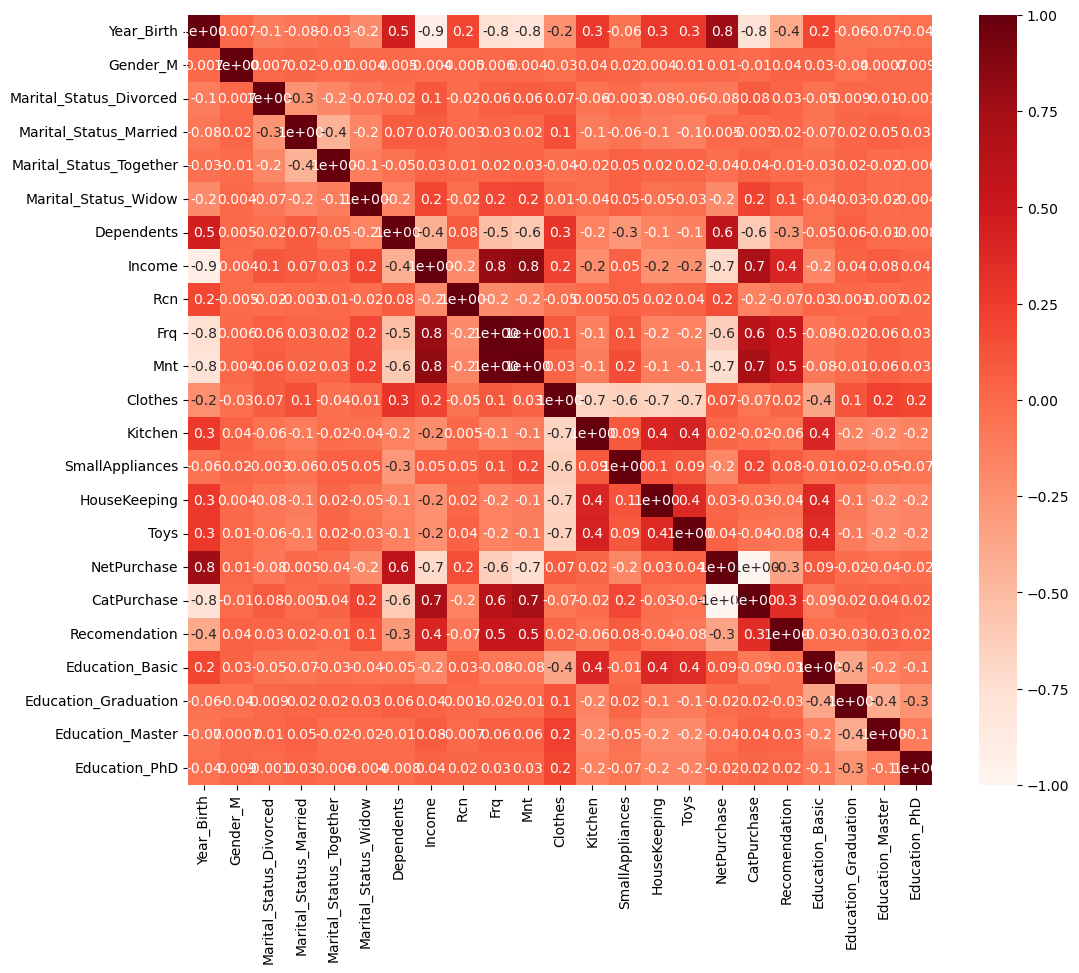

In [76]:
cor_pearson = X_train.corr()
cor_heatmap(cor_pearson)

Decide which variables to keep or withdraw.

In [77]:
X_train = X_train.drop(['Income', 'Year_Birth'], axis=1)

#do the same for validation
X_val = X_val.drop(['Income', 'Year_Birth'], axis=1)

__`Step 4.6:`__ Using GaussianNB, create a Naive Bayes classifier instance called modelNB.

In [78]:
modelNB = GaussianNB(var_smoothing=0.0001)

### Methods in GaussianNB

__`Step 4.7:`__ Use the `.fit()`method of model to fit the model to the array of points `X_train` and `y_train`,i.e., associate the argument keyword `X` to `X_train` and `y` to `y_train`.

In [79]:
modelNB.fit(X = X_train, y = y_train)

GaussianNB(var_smoothing=0.0001)

__`Step 4.8:`__ Use the `.predict()` method of modelNB to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [80]:
labels_train = modelNB.predict(X_train)
labels_val = modelNB.predict(X_val)

__`Step 4.9:`__ Use the `.predict_proba()` method of modelNB to obtain the probability estimates for the `X_val`

In [82]:
#CODE HERE
modelNB.predict_proba(X_val)

array([[4.99973598e-04, 9.99500026e-01],
       [9.98129714e-01, 1.87028571e-03],
       [4.50359900e-01, 5.49640100e-01],
       ...,
       [9.96829344e-01, 3.17065584e-03],
       [8.00952338e-02, 9.19904766e-01],
       [9.99405674e-01, 5.94325587e-04]])

__`Step 4.10:`__ Use the `.score()` method of modelNB to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`

In [83]:
#CODE HERE
modelNB.score(X_train, y_train)

0.8362666666666667

__`Step 4.11:`__ Use the `.score()` method of modelNB to obtain the mean accuracy of the given test data `X_val` and the true labels for X, `y_val`

In [84]:
#CODE HERE
modelNB.score(X_val, y_val)

0.8272

### Attributes in GaussianNB

__`Step 4.12:`__ Call the attribute `.class_prior_` in modelNB to check the probability of each class. 

In [85]:
modelNB.class_prior_

array([0.93013333, 0.06986667])

In here you can verify that the probability of the dependent variable being one in our dataset is only 7% from the total dataset.

__`Step 4.13:`__ Call the attribute `.class_count_` in modelNB to verify the number of training samples observed in eacg class.

In [86]:
modelNB.class_count_

array([1744.,  131.])

In the training dataset, 1744 observations have 0 as dependent variable, while only 131 observations have 1 as dependent variable.

__`Step 4.14:`__ Call the attribute `.theta_` in modelNB to verify the mean of each feature per class.

In [87]:
modelNB.theta_

array([[2.36238532e-01, 9.57568807e-02, 3.87614679e-01, 2.34518349e-01,
        3.95642202e-02, 7.40825688e-01, 6.42586009e+01, 1.87545872e+01,
        5.73144358e+02, 5.06680046e+01, 7.16513761e+00, 2.80028670e+01,
        7.13933486e+00, 7.00917431e+00, 4.33497706e+01, 5.66502294e+01,
        3.86639908e+00, 1.25573394e-01, 4.99426606e-01, 1.39334862e-01,
        6.70871560e-02],
       [2.21374046e-01, 1.29770992e-01, 3.81679389e-01, 2.44274809e-01,
        9.92366412e-02, 2.67175573e-01, 5.44580153e+01, 3.70381679e+01,
        1.74598534e+03, 5.53435115e+01, 5.21374046e+00, 2.96106870e+01,
        4.77862595e+00, 5.07633588e+00, 2.47786260e+01, 7.52213740e+01,
        4.84732824e+00, 9.92366412e-02, 4.73282443e-01, 1.83206107e-01,
        5.34351145e-02]])

In some variables we can verify that the mean is distinct taking into account the dependent variable associated. Take as example the variable Mnt (in the seventh column):
- For the customers where the dependent variable is 0, the value of Mnt is around 573 monetary units;
- For the customers who bougth the product (dependent variable = 1), the money spent is around 1746 monetary units.

_Note:_ If you dont remember the order of the variables, you can always call `data.columns`.

In [88]:
data.columns

Index(['Year_Birth', 'Gender_M', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Dependents', 'Income', 'Rcn', 'Frq', 'Mnt',
       'Clothes', 'Kitchen', 'SmallAppliances', 'HouseKeeping', 'Toys',
       'NetPurchase', 'CatPurchase', 'Recomendation', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

__`Step 4.15:`__ Call the attribute `.var_` in modelNB to verify the variance of each feature per class.

In [89]:
modelNB.var_

array([[4.55454572e+01, 4.54516148e+01, 4.56023969e+01, 4.55445468e+01,
        4.54030262e+01, 4.55570303e+01, 5.35775744e+03, 1.44059387e+02,
        3.62776970e+05, 6.04569600e+02, 1.08544179e+02, 2.03379354e+02,
        1.09512471e+02, 1.07285815e+02, 3.56881449e+02, 3.56881449e+02,
        4.66596781e+01, 4.54748320e+01, 4.56150270e+01, 4.54849480e+01,
        4.54276138e+01],
       [4.55373949e+01, 4.54779578e+01, 4.56010275e+01, 4.55496319e+01,
        4.54544160e+01, 4.55608201e+01, 9.05170517e+02, 1.30317769e+02,
        3.84643321e+05, 4.21254661e+02, 7.17620904e+01, 2.01938654e+02,
        6.93541888e+01, 6.92370627e+01, 2.64010677e+02, 2.64010677e+02,
        4.61203446e+01, 4.54544160e+01, 4.56143135e+01, 4.55146689e+01,
        4.54156071e+01]])

By calling the attribute var, we obtain the variance of each variable, for both labels (0 and 1).

### 5. Assess

__`Step 5:`__ We already have the ground truth and the predicted values. In this way we can start evaluating the performance of our model in the train and the validation dataset.

#### Presenting the classification report and the confusion matrix for Train and Validation

__`Step 5.1:`__ To evaluate the results, we are going to use the classification report method that will return the main classification metrics. <br>
Import `classification_report` and `confusion_matrix` from sklearn.metrics

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

__`Step 5.2:`__: Create  a function named `metrics` that will print the results of the classification report and the confusion matrix for both datasets (train and validation) _(written for you)_

In [91]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

__`Step 5.3:`__ Call the function metrics() defined previously, and define the arguments: <br> (`y_train = y_train`, `pred_train = labels_train` , `y_val = y_val`, `pred_val = labels_val`)

In [92]:
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1744
           1       0.27      0.77      0.40       131

    accuracy                           0.84      1875
   macro avg       0.62      0.81      0.65      1875
weighted avg       0.93      0.84      0.87      1875

[[1467  277]
 [  30  101]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

The confusion matrix in sklearn is presented in the following format: <br>
[ [ TN  FP  ] <br>
    [ FN  TP ] ]

Now you have the main results for your training and validation dataset.

# <font color='#E8800A'>Exercise</font><a class="anchor" id="third-bullet"></a>
 [Back to TOC](#toc)

__`Exercise 1:`__ Create a function for the tennis dataset that given the features of an instance can predict the outcome! <br>

In [ ]:
def result(outlook, temperature, humidity, windy):
    
    #calculate the probability of playing today
    a1 = len(weather[(weather.PLAY == 'Yes') & (weather.OUTLOOK == outlook)]) / len(weather[weather.PLAY == 'Yes'])
    a2 = len(weather[(weather.PLAY == 'Yes') & (weather.TEMPERATURE == temperature)]) / len(weather[weather.PLAY == 'Yes'])
    a3 = len(weather[(weather.PLAY == 'Yes') & (weather.HUMIDITY == humidity)]) / len(weather[weather.PLAY == 'Yes'])
    a4 = len(weather[(weather.PLAY == 'Yes') & (weather.WINDY == windy)]) / len(weather[weather.PLAY == 'Yes'])
    a5 = len(weather[weather.PLAY == 'Yes'])/len(weather)
    p_yes_today = a1 * a2 * a3 * a4 * a5
    
    #repeat the same for no 
    b1 = len(weather[(weather.PLAY == 'No') & (weather.OUTLOOK == outlook)]) / len(weather[weather.PLAY == 'No'])
    b2 = len(weather[(weather.PLAY == 'No') & (weather.TEMPERATURE == temperature)]) / len(weather[weather.PLAY == 'No'])
    b3 = len(weather[(weather.PLAY == 'No') & (weather.HUMIDITY == humidity)]) / len(weather[weather.PLAY == 'No'])
    b4 = len(weather[(weather.PLAY == 'No') & (weather.WINDY == windy)]) / len(weather[weather.PLAY == 'No'])
    b5 = len(weather[weather.PLAY == 'No'])/len(weather)
    p_no_today = b1 * b2 * b3 * b4 * b5
    
    #normalize results to ensure probability of event and complement = 1
    P_yes_today = p_yes_today / (p_yes_today + p_no_today)
    P_no_today = p_no_today / (p_yes_today + p_no_today)
    
    #make decision
    if P_yes_today > P_no_today:
        outcome = 'Yes'
    else:
        outcome = 'No'
    return outcome

In [ ]:
result('Sunny', 'Cool', 'High', 'True')